In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Matplotlib is building the font cache; this may take a moment.


In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



# Problem 1 : Analysis of Numeric Variables

In this problem, your job is to analyze the following numeric variables in the dataset and their relationship with SalePrice.

['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

    a) Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?
    b) Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?
    c) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

Hints and Pointers

    o In case of box-plot, outliers are the datapoints outside the whiskers, which are at Q1 – 1.5 IQR and Q3 + 1.5 IQR.
    o Pandas has a bunch of statistical measures built in as methods/functions; .median() and .mean(), for example.
    o Predicting one numeric variable with another numeric variable is easiest when they have a strong relationship.

In [3]:
#keep relevant columns
train_data1 = train_data[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']]
train_data1.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


a) Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?

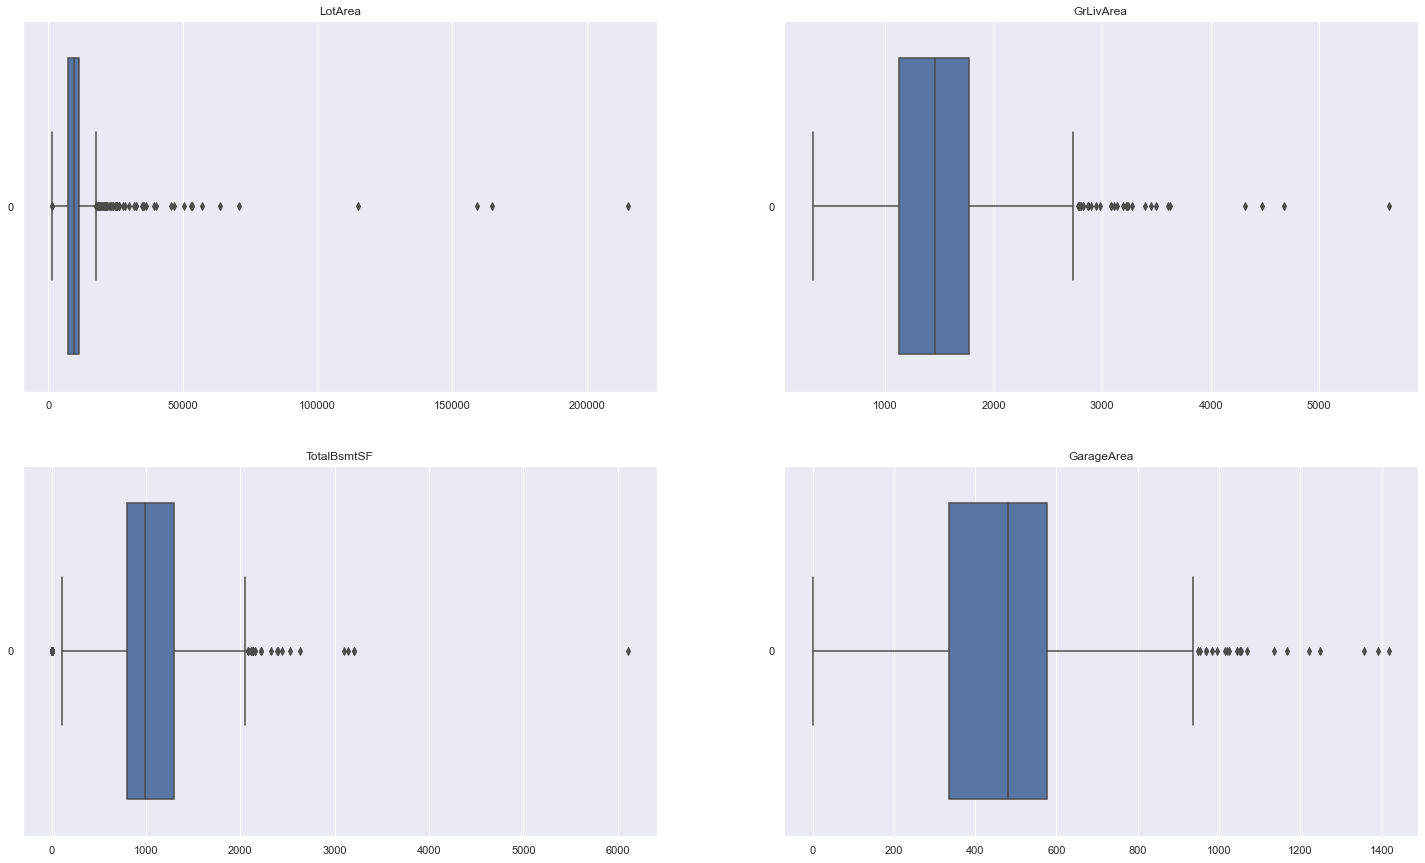

In [4]:
# Draw the distributions of all variables
f, axes = plt.subplots(2, 2, figsize=(25, 15))

row = 0
col = 0
for var in train_data1:
    if var=='SalePrice':
        break
    sb.boxplot(data = train_data1[var], orient = "h", ax = axes[row,col]).set_title(var)
    
    #update axis
    if col==1:
        col = 0
        row += 1
    else:
        col += 1;
        

In [5]:
#calculate outliers
for var in train_data1:
    if var == 'SalePrice':
        break
    df = train_data1[var]
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    print(var, ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())   #use formula to see which points lie outside normal range
    
#LotArea has the most number of outliers at 69 points

LotArea 69
GrLivArea 31
TotalBsmtSF 61
GarageArea 21


b) Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?

LotArea 12.207687851233496
GrLivArea 1.3665603560164552
TotalBsmtSF 1.5242545490627664
GarageArea 0.17998090674623907


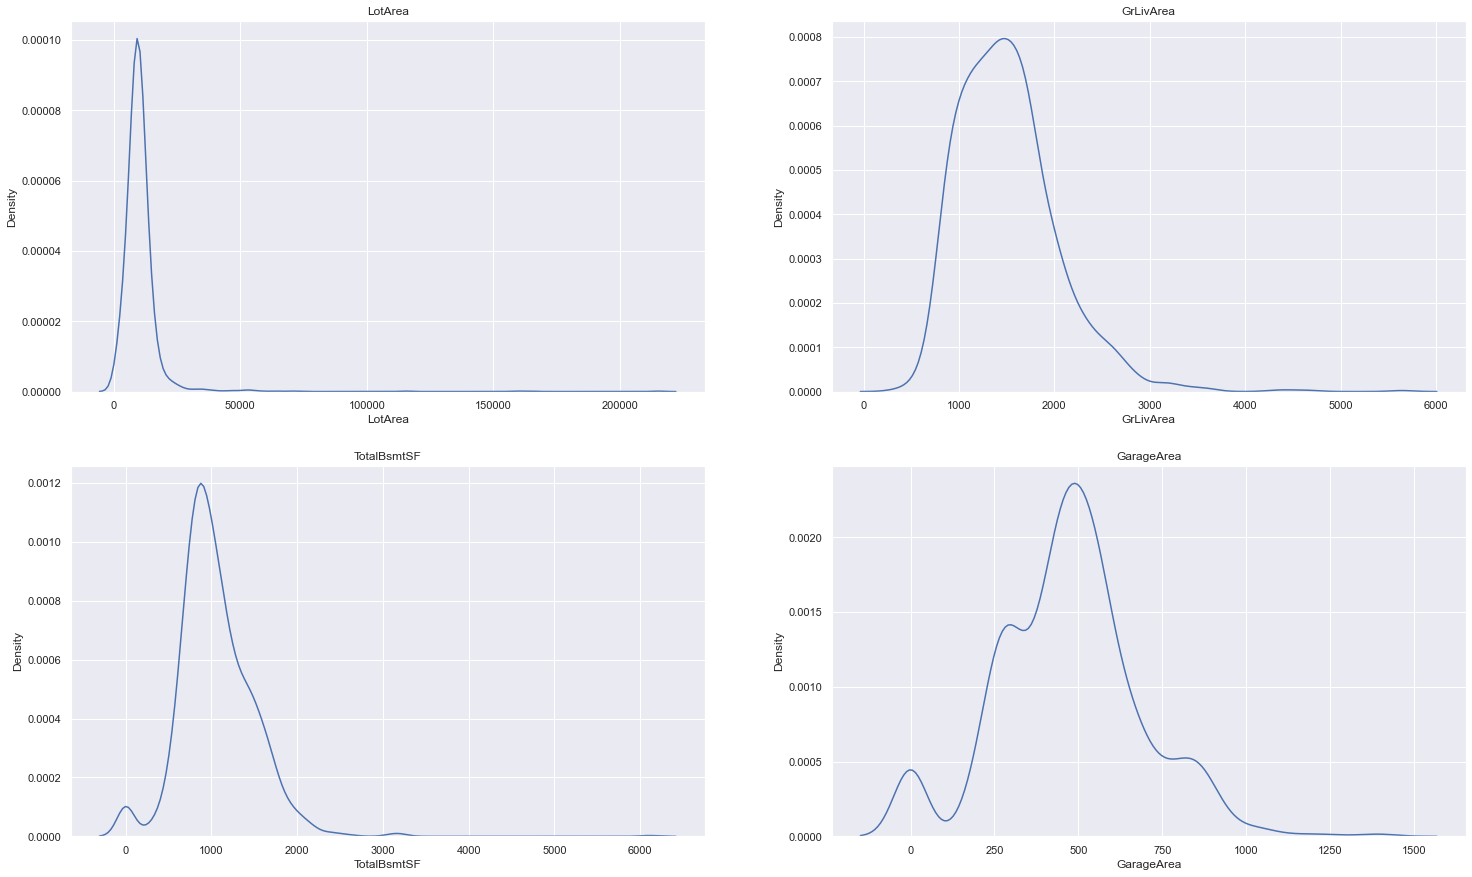

In [37]:
# Draw the distributions of all variables
f, axes = plt.subplots(2, 2, figsize=(25, 15))

row = 0
col = 0
for var in train_data1:
    if var=='SalePrice':
        break
    sb.kdeplot(data = train_data1[var], ax = axes[row,col]).set_title(var)
    print(var, train_data1[var].skew())
    
    #update axis
    if col==1:
        col = 0
        row += 1
    else:
        col += 1;
        

The most skewed variable is LotArea which is very much positively skewed

c) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

In [7]:
print(train_data1.corr())
#focus on the last row

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


The 2 var that has the strongest relationship with SalePrice are GrLivArea and GarageArea.
However, GarageArea normal distribution curve is rather skewed so I would opt to use Total BsmtSF instead since it corr with SalePrice is not that different.

# Problem 2 : Analysis of Categorical Variables


In this problem, your job is to analyze the following categorical variables in the data and their relationship with SalePrice.
['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']

    a) Which of these variables has the highest number of levels? Which of the levels has the highest number of houses?
    b) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.
    
Hints and Pointers

    o Levels for a categorical variable means the number of unique values. For example, gender has 3 levels, F, M, O.
    o Each level of a categorical variable may contain a number of datapoints. For example, 14 M found in a dataset.
    o When you want to find relationship between a numeric variable and a categorical one, you can’t do Correlation.
    o Check box-plot function in seaborn carefully – there is a way to plot a numeric vs a categorical in the two axes.
    o Think: If there was a relationship between Salary and Gender, what would box-plot of Salary be across F, M, O?


In [8]:
train_data2 = train_data[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual', 'SalePrice']]
train_data2.head()

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000


a) Which of these variables has the highest number of levels? Which of the levels has the highest number of houses?

Number of MSSubClass : 15
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

Number of Neighborhood : 25
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Number of BldgType : 5
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

Number of OverallQual : 10
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64



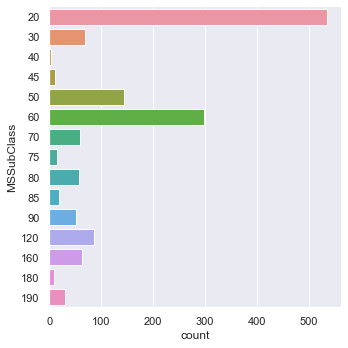

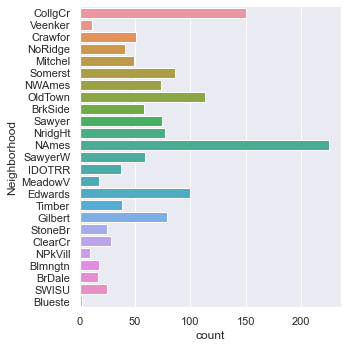

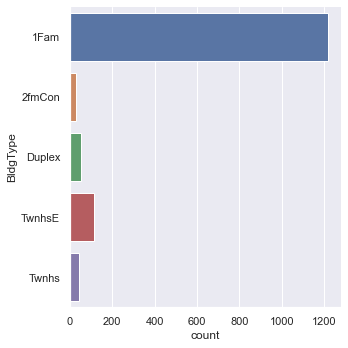

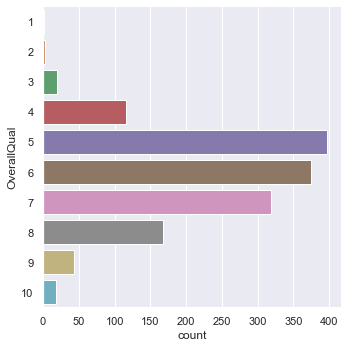

In [9]:
for var in train_data2:
    if var == 'SalePrice':
        break
    print("Number of {} : {}".format(var, len(train_data2[var].unique()))) 
    print(train_data2[var].value_counts())
    print()
    sb.catplot(y = var, data = train_data2, kind = "count")

Neighbourhood has the most levels and amongst them, NAmes neighbourhood has the most number of houses

b) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

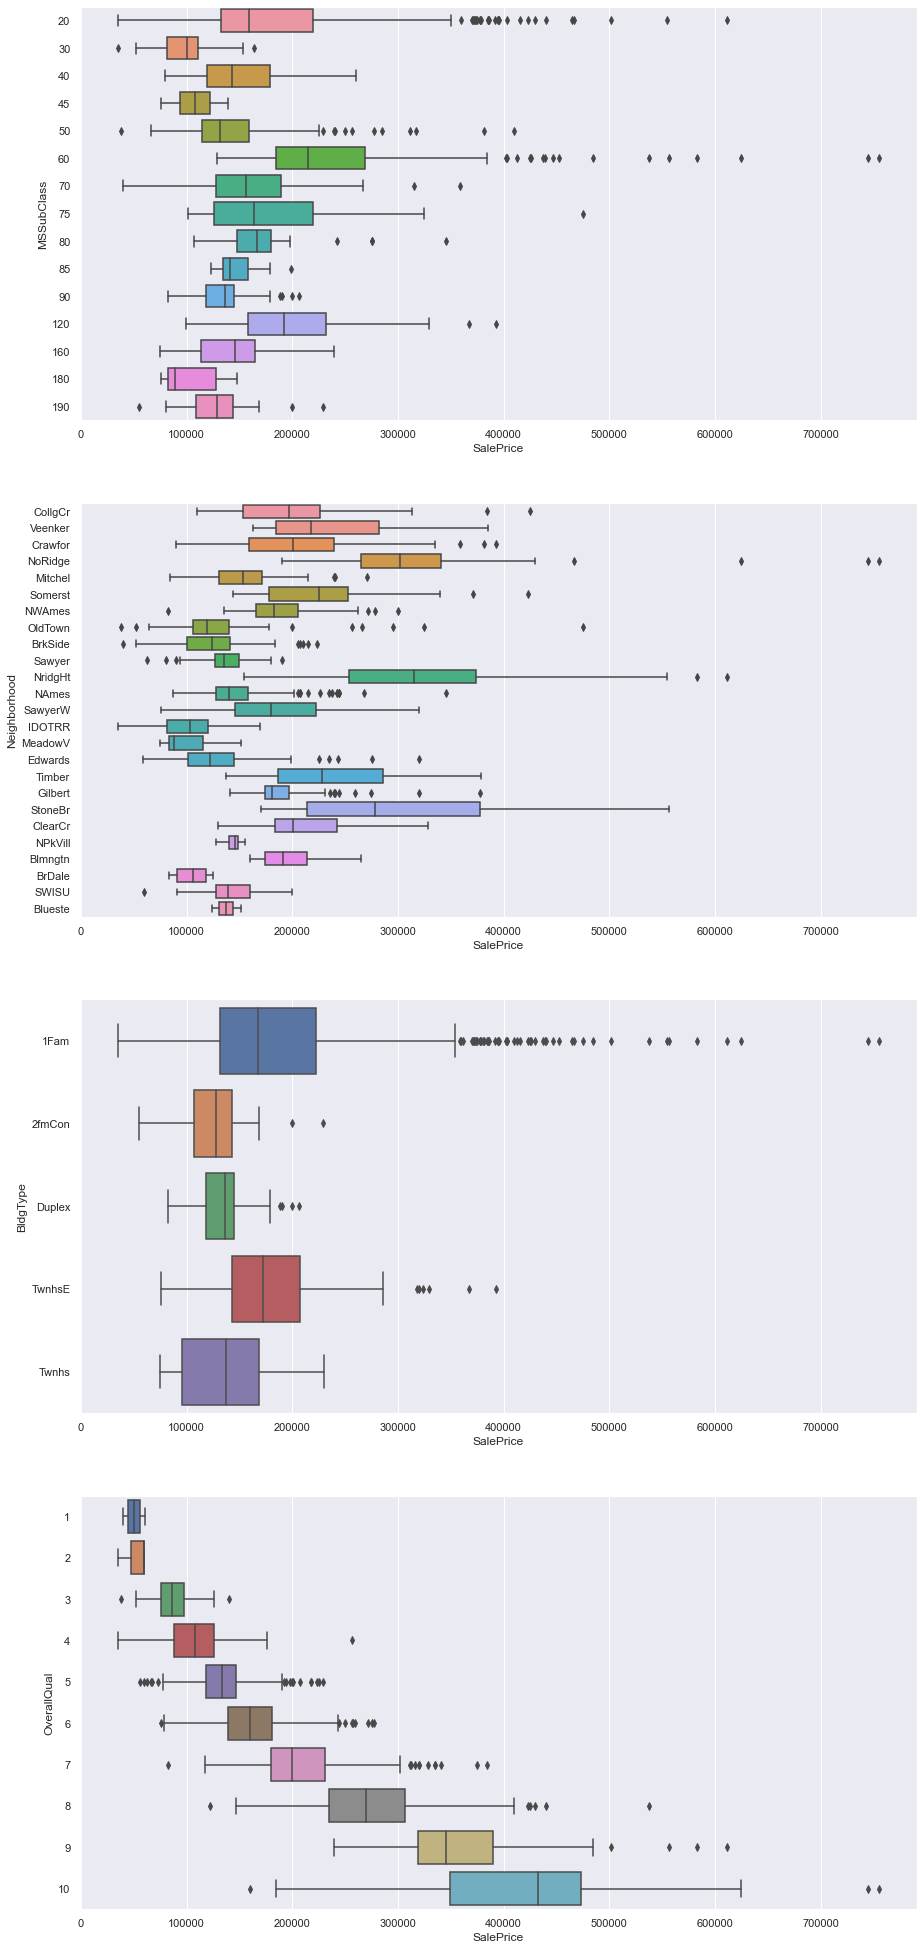

In [10]:
f, axes = plt.subplots(4, figsize=(15, 35))
count = 0
for var in train_data2:
    if var=='SalePrice':
        break
    sb.boxplot(data = train_data2, orient = "h", x = train_data2['SalePrice'], y = var, ax = axes[count])
    count+=1


        

From the boxplot we can see that the variable 'OverallQual' is in a linear relationship with SalePrice. The higher the quality, the higher the SalePrice. Thus OverallQual is a good varaibel to choose.

Second variable I would consider is BldgType.

# Problem 3 : Interesting Questions for EDA

Choose any ONE of the following questions to answer. You may always try out the other one at home if you want.

    a) Does the SalePrice of a house get affected by whether it has a Garage or not? Justify your answer using EDA.
    b) Does the SalePrice of a house get affected by how recently it got Remodeled? Justify your answer using EDA.
    
Hints and Pointers

    o Check the data_description file very carefully and pick the variables you want to work with for these problems.
    o In some cases, it is alright to create new variables out of the original ones, especially if they help you analyze.
    o Do keep an eye out for missing values in the variables that you tackle and see what you can make out of those.

In [22]:
#b)
# YearBuilt: Original construction date
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
df = train_data[['YearBuilt', 'YearRemodAdd', 'YrSold', 'SalePrice']]
df.head()

,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,2003,2003,2008,208500
1,1976,1976,2007,181500
2,2001,2002,2008,223500
3,1915,1970,2006,140000
4,2000,2000,2008,250000


In [23]:
#see which house has not been remodelled before
df['Remod'] = df['YearBuilt'] != df['YearRemodAdd']
df.head()

C:\Users\AG0001QI\AppData\Local\Temp/ipykernel_10176/3321391373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Remod'] = df['YearBuilt'] != df['YearRemodAdd']


,YearBuilt,YearRemodAdd,YrSold,SalePrice,Remod
0,2003,2003,2008,208500,False
1,1976,1976,2007,181500,False
2,2001,2002,2008,223500,True
3,1915,1970,2006,140000,True
4,2000,2000,2008,250000,False


In [24]:
NoRemod = len(df[df['Remod'] == False])
print("Number of houses with no remodelling:",NoRemod)

Number of houses with no remodelling: 764


In [25]:
#remove houses without remodeling
df2 = df.drop(df[df.Remod == False].index)
df2

,YearBuilt,YearRemodAdd,YrSold,SalePrice,Remod
2,2001,2002,2008,223500,True
3,1915,1970,2006,140000,True
5,1993,1995,2009,143000,True
6,2004,2005,2007,307000,True
8,1931,1950,2008,129900,True
...,...,...,...,...,...
1454,2004,2005,2009,185000,True
1455,1999,2000,2007,175000,True
1456,1978,1988,2010,210000,True
1457,1941,2006,2010,266500,True


In [29]:
df2['RemodYrDiff'] = df2['YrSold'] - df2['YearRemodAdd']
#df2.loc[df2['Remod'] == False, 'RemodYrDiff'] = -1
df2


,YearBuilt,YearRemodAdd,YrSold,SalePrice,Remod,RemodYrDiff
2,2001,2002,2008,223500,True,6
3,1915,1970,2006,140000,True,36
5,1993,1995,2009,143000,True,14
6,2004,2005,2007,307000,True,2
8,1931,1950,2008,129900,True,58
...,...,...,...,...,...,...
1454,2004,2005,2009,185000,True,4
1455,1999,2000,2007,175000,True,7
1456,1978,1988,2010,210000,True,22
1457,1941,2006,2010,266500,True,4


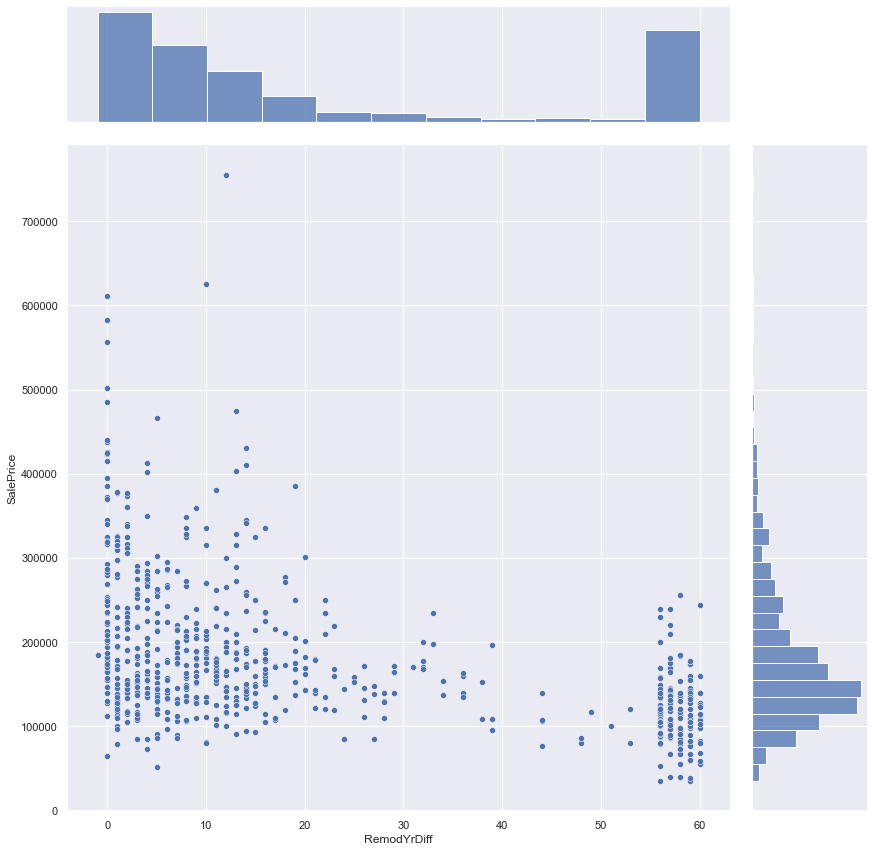

In [30]:
sb.jointplot(data = df2[['RemodYrDiff', 'SalePrice']], x = "RemodYrDiff", y = "SalePrice", height = 12) 

In [31]:
df2['RemodYrDiff'].corr(df2['SalePrice'])

-0.4499966765508088

How recent the house is remodelled actually does not really affect the price of the house very much. There is a moderate relationship between the year remodelled and Saleprice where the more recent it was remodelled, the higher the price. 